In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_excel("C:/Users/Dayakar Reddy Sura/Downloads/EastWestAirlines.xlsx",sheet_name="data")


In [3]:
data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.shape

(3999, 12)

In [6]:
data.isnull().sum().sum()

0

In [7]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

In [8]:
data.describe().iloc[:,1:]

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [9]:
data1=data.copy()

In [10]:
data2=data1.drop(['ID#'],axis=1)
data2.head(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0

In [11]:
data2.columns=data2.columns.str.lower()

In [12]:
data2.describe()

balance    qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         bonus_miles  bonus_trans  flight_miles_12mo  flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       days_since_enroll       award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [13]:
data2['cc1_miles'].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [14]:
data2['cc2_miles'].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [15]:
data2['cc3_miles'].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [16]:
data2['flight_miles_12mo'].value_counts()

flight_miles_12mo
0        2723
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: count, Length: 343, dtype: int64

In [17]:
data2['flight_trans_12'].value_counts()

flight_trans_12
0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: count, dtype: int64

In [18]:
for i in data2:
    Q1 = data2[i].quantile(0.25)
    Q3 = data2[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data2[(data2[i] > up) | (data2[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

balance yes
qual_miles yes
cc1_miles no
cc2_miles yes
cc3_miles yes
bonus_miles yes
bonus_trans yes
flight_miles_12mo yes
flight_trans_12 yes
days_since_enroll no
award? no


In [19]:
for i in data2:
    
    Q1 = data2[i].quantile(0.25)
    Q3 = data2[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    data2.loc[data2[i]>up_lim,i]=up_lim
    data2.loc[data2[i]<low_lim,i]=low_lim

C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_9044\1679992877.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '203218.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[data2[i]>up_lim,i]=up_lim
C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_9044\1679992877.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '57626.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[data2[i]>up_lim,i]=up_lim
C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_9044\1679992877.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '777.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[data2[i]>up_lim,i]=up_lim
C:\Use

In [20]:
'''def stand_func(i):
    x=(i-i.mean())/i.std()
    return x'''

'def stand_func(i):\n    x=(i-i.mean())/i.std()\n    return x'

'''data3=stand_func(data2.iloc[:,1:])
data3.describe()'''
###### No need to standardize the data ,we are standardize the data more null values are created

C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_9044\1562511158.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data2)
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


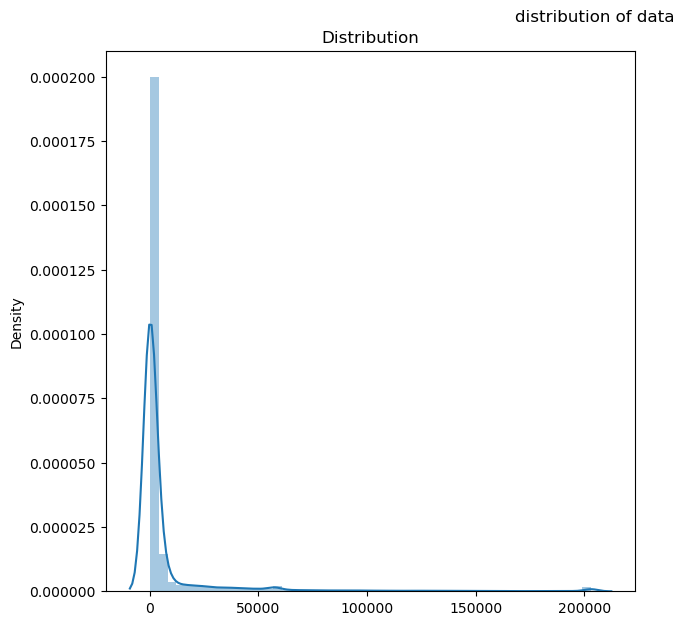

In [21]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of data")
#for i in data3:
plt.subplot(2,2,k)
sn.distplot(data2)
plt.title("Distribution")
plt.tight_layout()
k+=1

<Axes: ylabel='Frequency'>

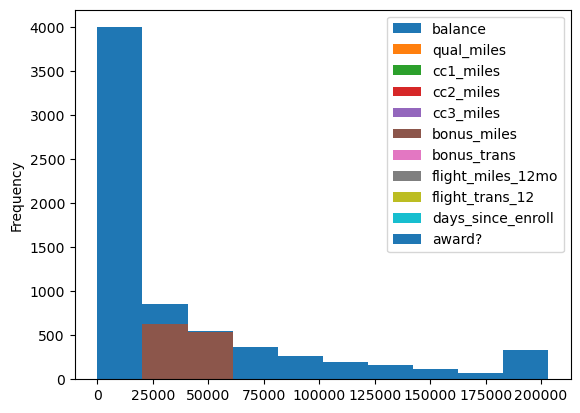

In [22]:
data2.plot(kind='hist')

<Axes: >

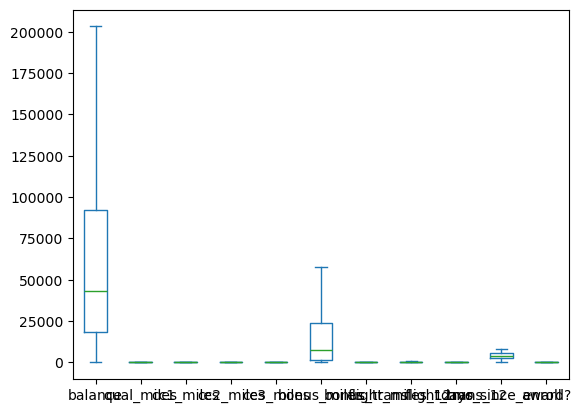

In [23]:
data2.plot(kind='box')

<Axes: ylabel='Frequency'>

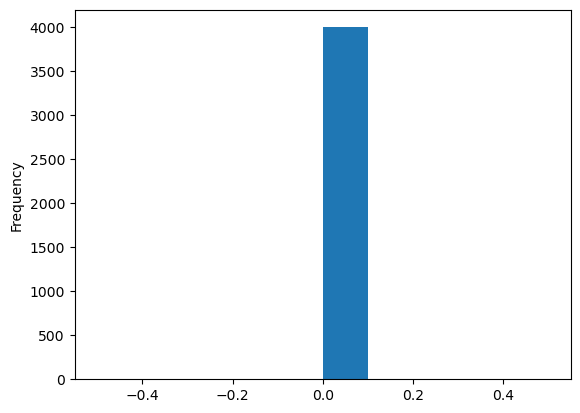

In [24]:
data2.qual_miles.plot(kind='hist')

<Axes: >

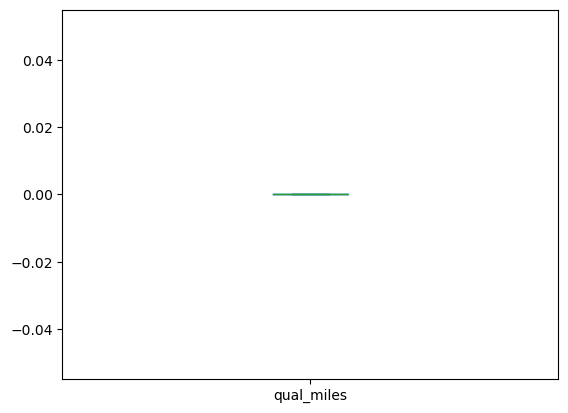

In [25]:
data2.qual_miles.plot(kind='box')

<Axes: ylabel='Frequency'>

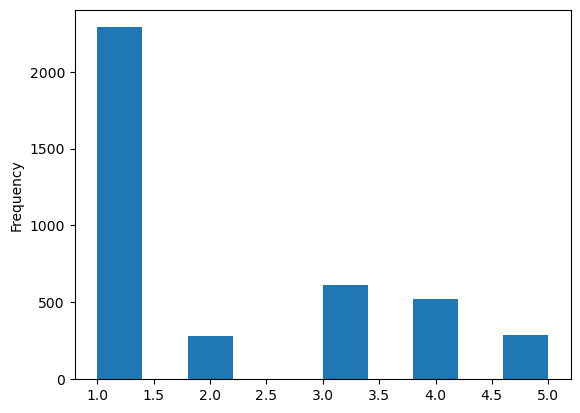

In [26]:
data2.cc1_miles.plot(kind='hist')

<Axes: >

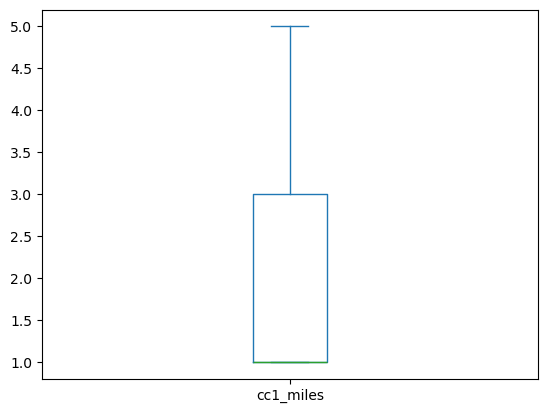

In [27]:
data2.cc1_miles.plot(kind='box')

<Axes: ylabel='Frequency'>

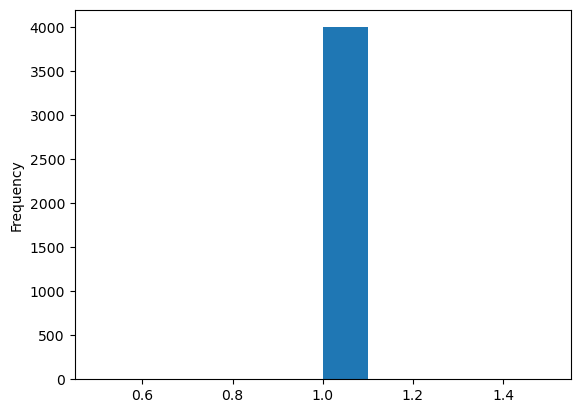

In [28]:
data2.cc2_miles.plot(kind='hist')

<Axes: >

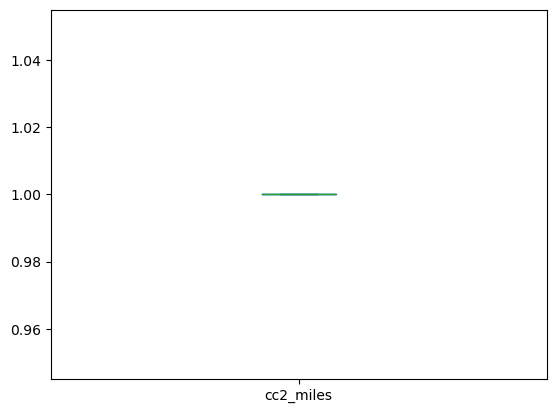

In [29]:
data2.cc2_miles.plot(kind='box')

<Axes: ylabel='Frequency'>

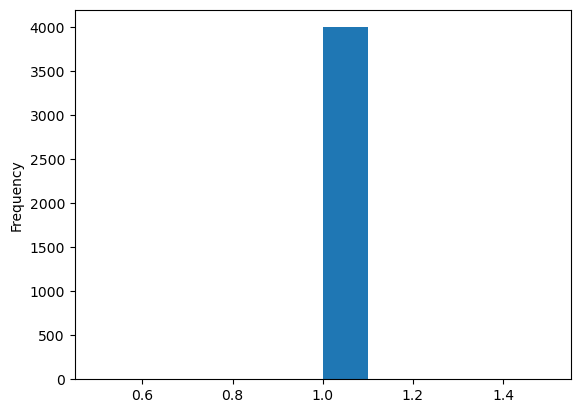

In [30]:
data2.cc3_miles.plot(kind='hist')

<Axes: >

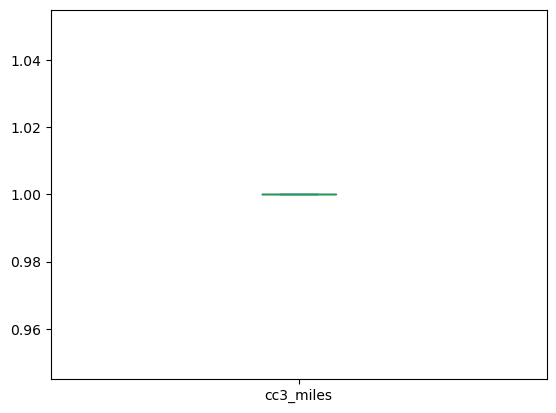

In [31]:
data2.cc3_miles.plot(kind='box')

<Axes: ylabel='Frequency'>

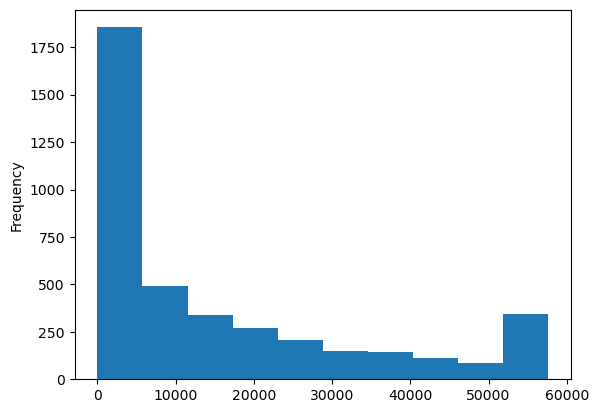

In [32]:
data2.bonus_miles.plot(kind='hist')

<Axes: >

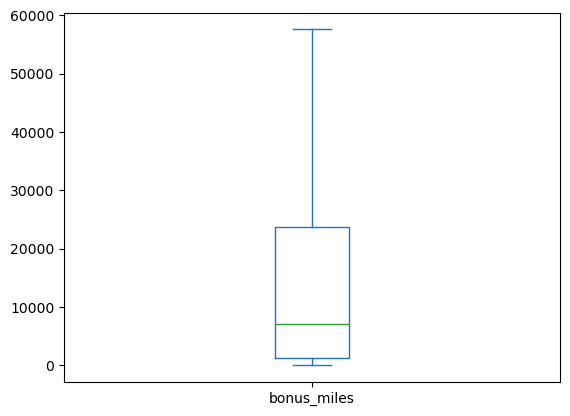

In [33]:
data2.bonus_miles.plot(kind='box')

<Axes: ylabel='Frequency'>

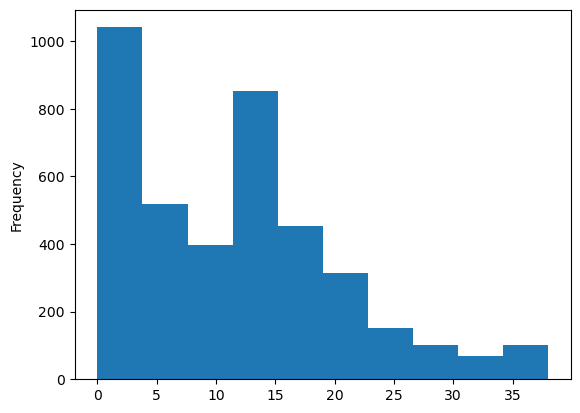

In [34]:
data2.bonus_trans.plot(kind='hist')

<Axes: >

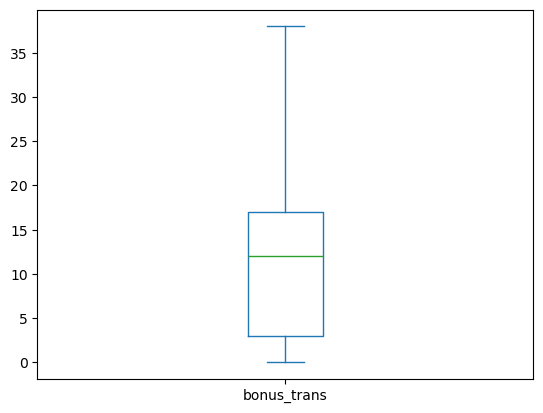

In [35]:
data2.bonus_trans.plot(kind='box')

<Axes: ylabel='Frequency'>

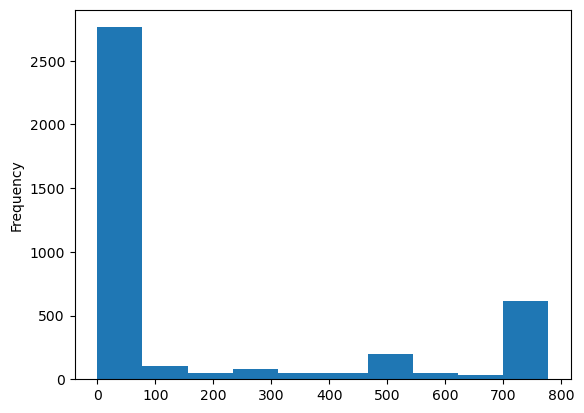

In [36]:
data2.flight_miles_12mo.plot(kind='hist')

<Axes: >

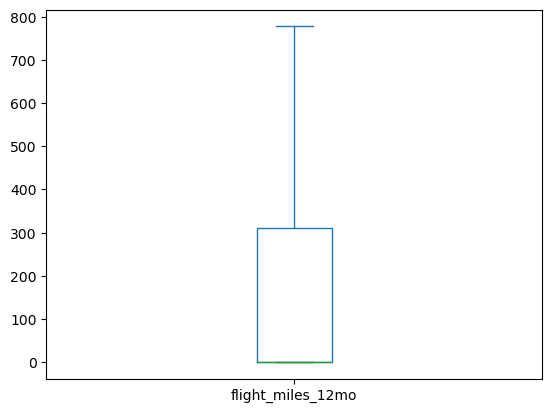

In [37]:
data2.flight_miles_12mo.plot(kind='box')

<Axes: ylabel='Frequency'>

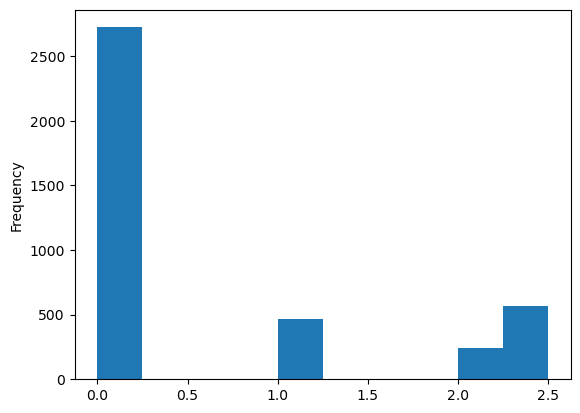

In [38]:
data2.flight_trans_12.plot(kind='hist')

<Axes: >

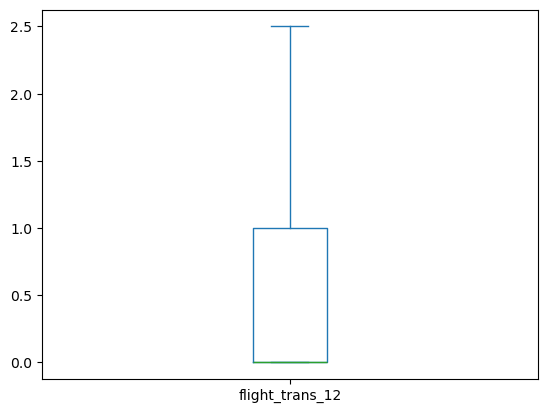

In [39]:
data2.flight_trans_12.plot(kind='box')

<Axes: ylabel='Frequency'>

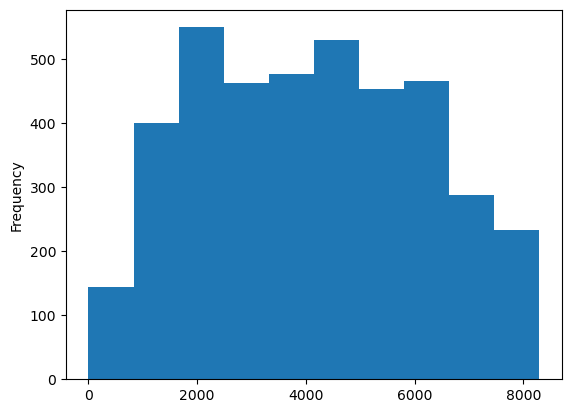

In [40]:
data2.days_since_enroll.plot(kind='hist')

<Axes: >

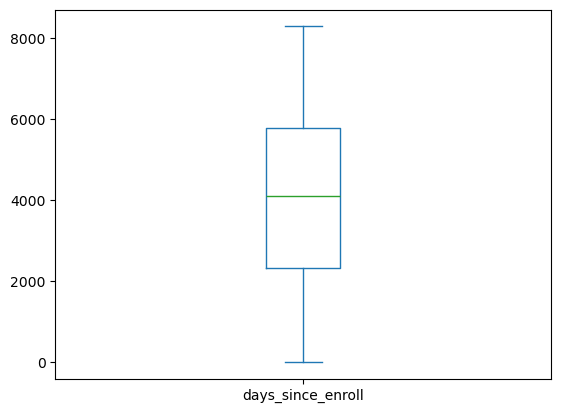

In [41]:
data2.days_since_enroll.plot(kind='box')

<Axes: ylabel='Frequency'>

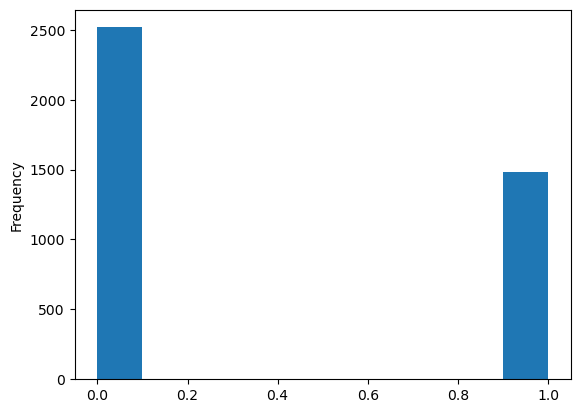

In [42]:
data2['award?'].plot(kind='hist')

<Axes: ylabel='count'>

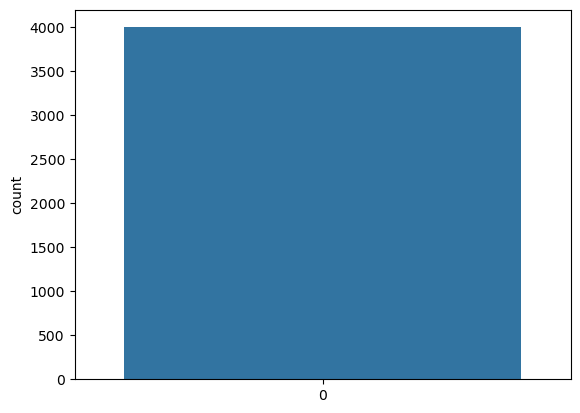

In [43]:
sn.countplot(data2['cc1_miles'])

<Axes: ylabel='count'>

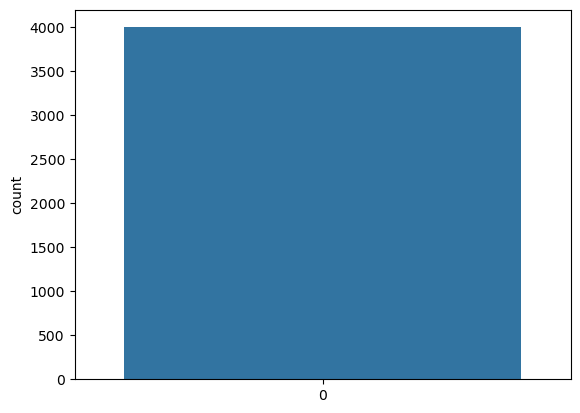

In [44]:
sn.countplot(data2['cc2_miles'])

<Axes: ylabel='count'>

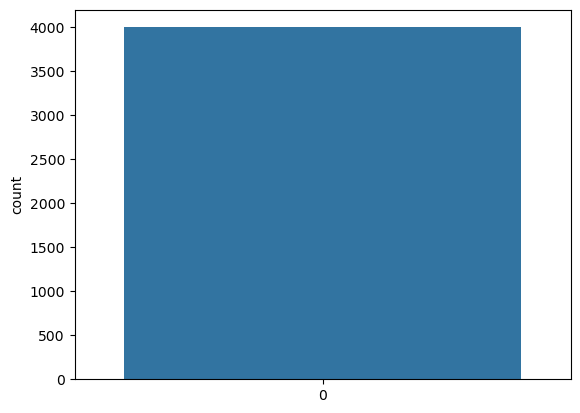

In [45]:
sn.countplot(data2['cc3_miles'])

<Axes: ylabel='count'>

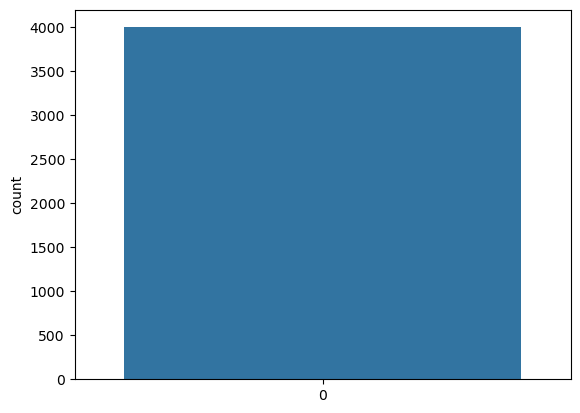

In [46]:
sn.countplot(data2['qual_miles'])

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

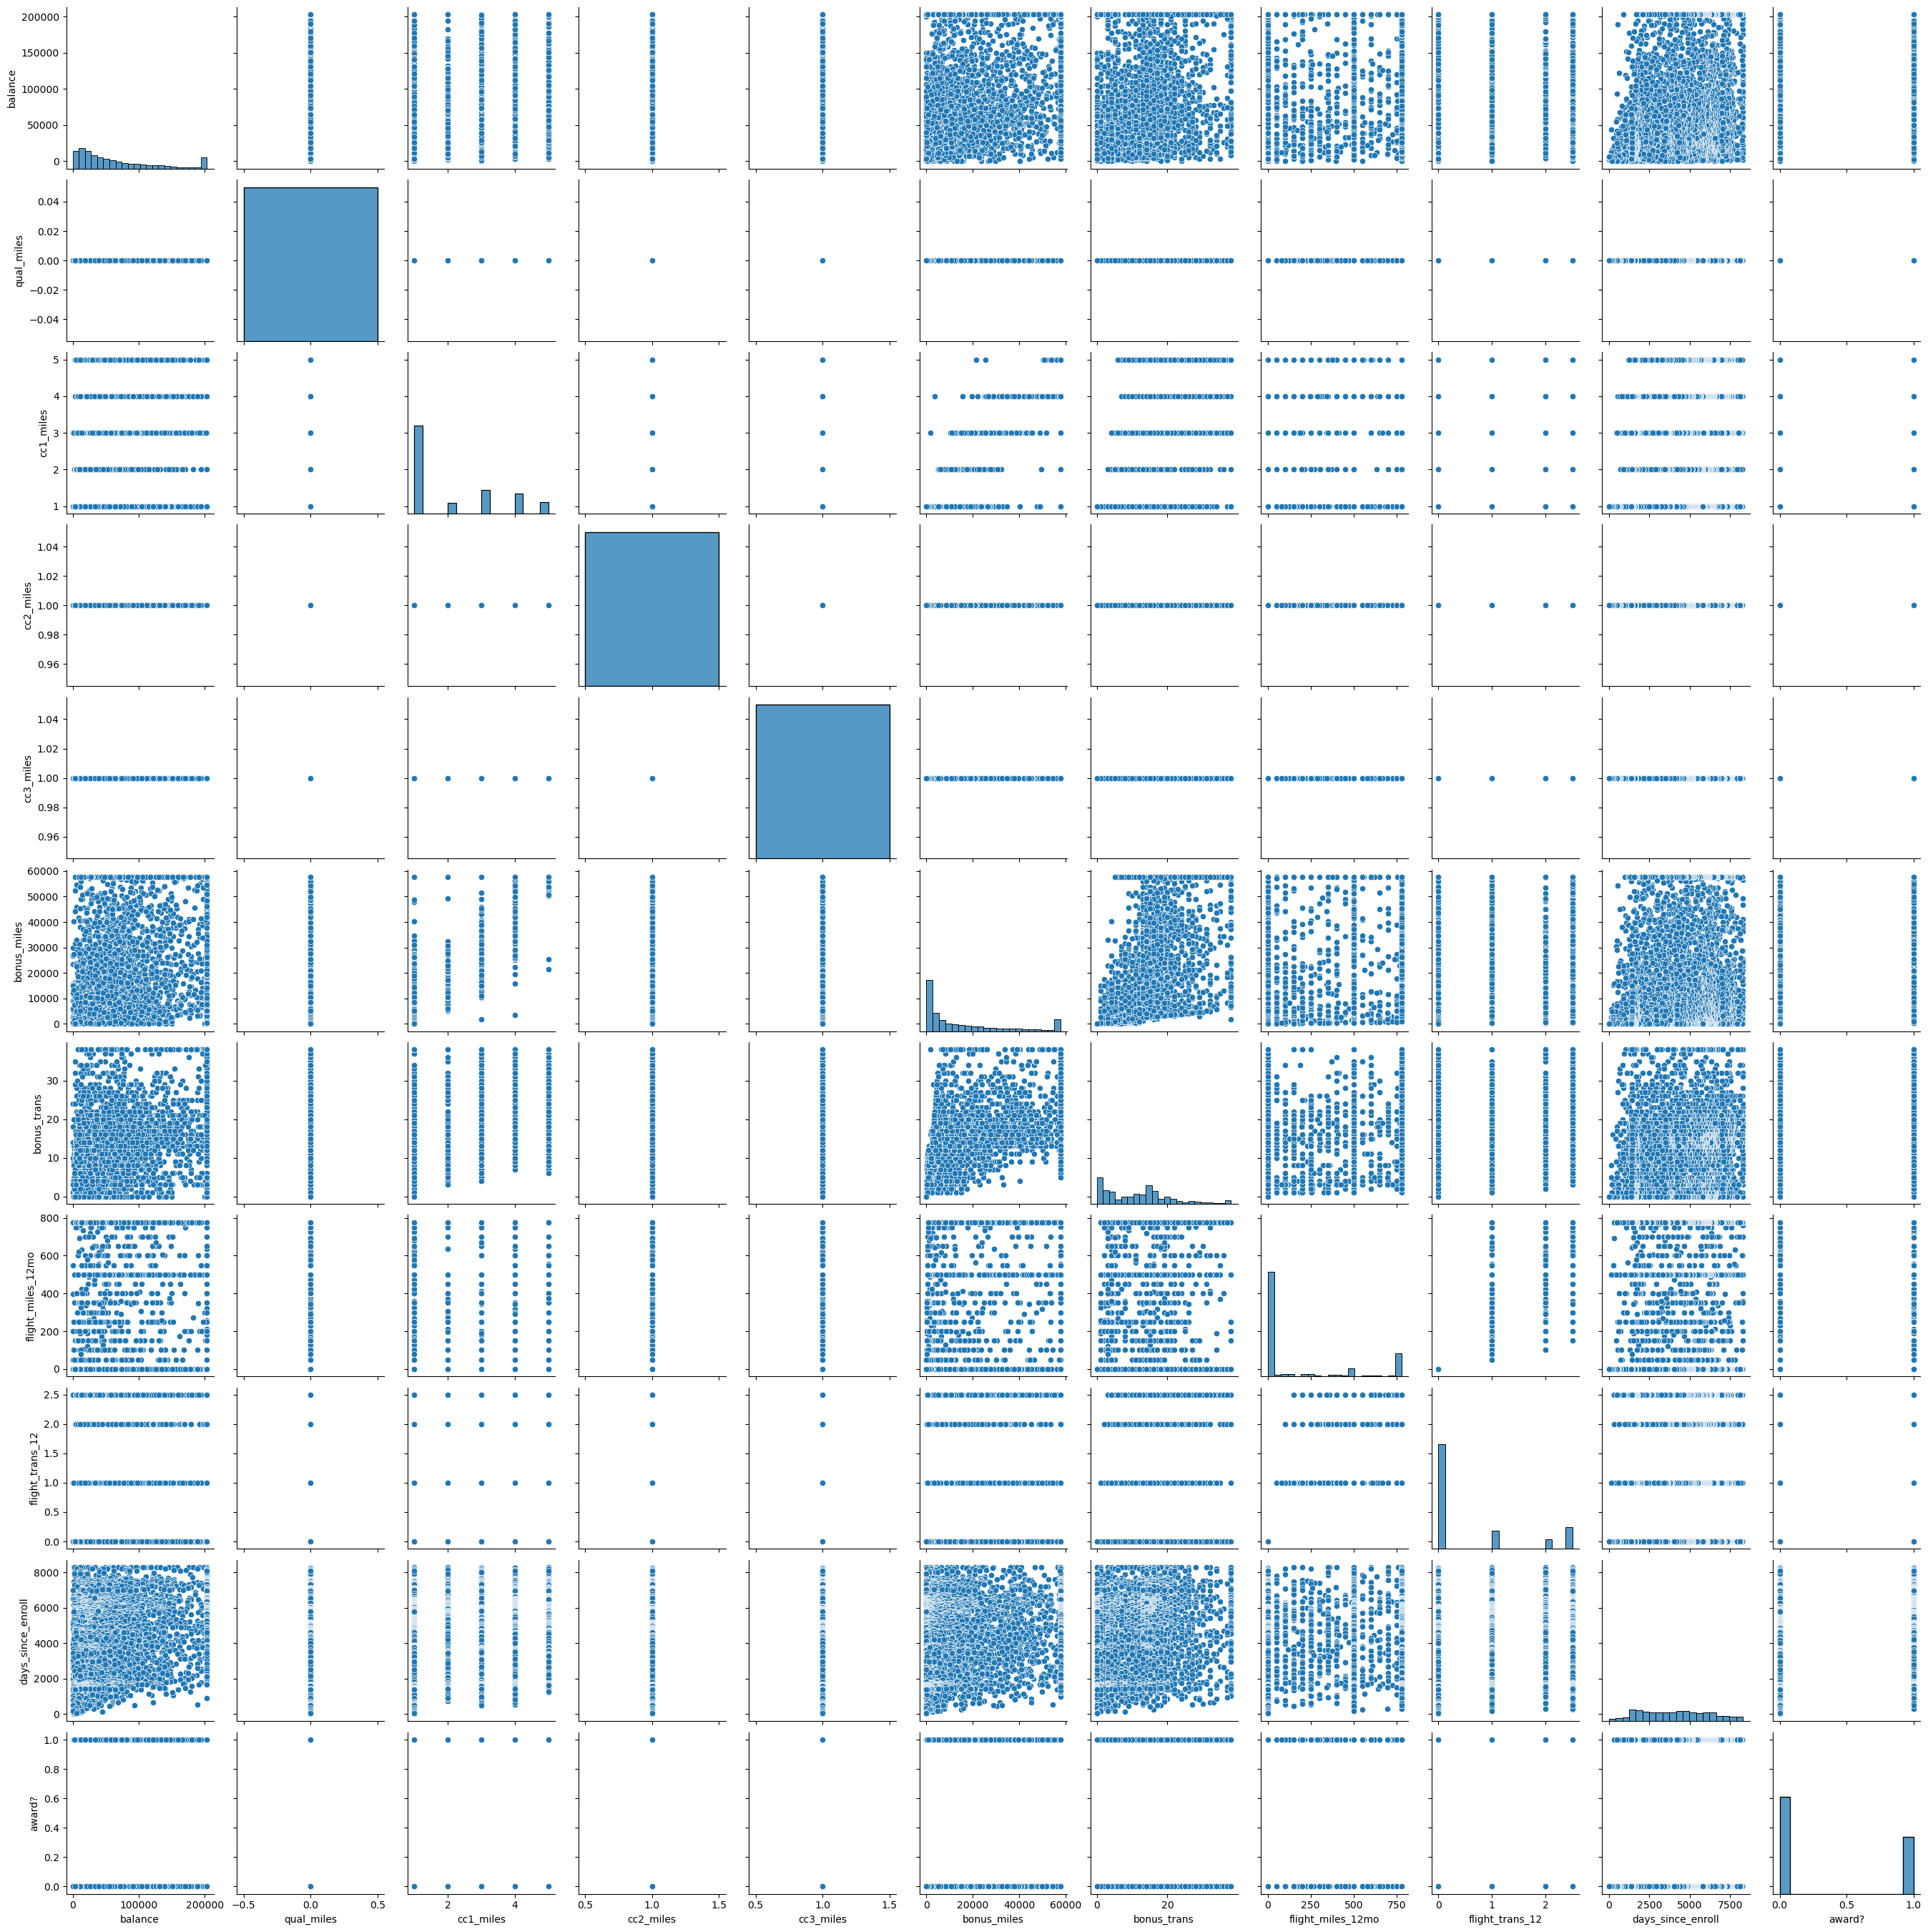

In [47]:
sn.pairplot(data2)

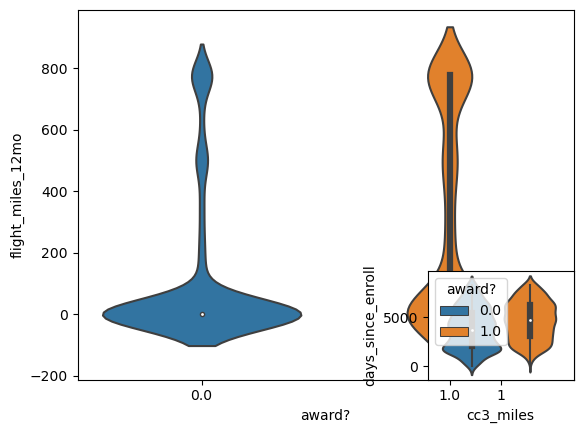

In [48]:
sn.violinplot(x ='award?',y ='flight_miles_12mo', data = data2)
plt.subplot(3,3,9)
sn.violinplot(x ='cc3_miles',y ='days_since_enroll',hue="award?", data = data2)
plt.show()

In [49]:
data2.corr()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  \
balance            1.000000         NaN   0.446510        NaN        NaN   
qual_miles              NaN         NaN        NaN        NaN        NaN   
cc1_miles          0.446510         NaN   1.000000        NaN        NaN   
cc2_miles               NaN         NaN        NaN        NaN        NaN   
cc3_miles               NaN         NaN        NaN        NaN        NaN   
bonus_miles        0.494422         NaN   0.912531        NaN        NaN   
bonus_trans        0.409017         NaN   0.627786        NaN        NaN   
flight_miles_12mo  0.297045         NaN   0.098786        NaN        NaN   
flight_trans_12    0.295565         NaN   0.087618        NaN        NaN   
days_since_enroll  0.286143         NaN   0.230849        NaN        NaN   
award?             0.170678         NaN   0.335457        NaN        NaN   

                   bonus_miles  bonus_trans  flight_miles_12mo  \
balance               0.494422     0.409017           0.297045   
qual_miles                 NaN          NaN                NaN   
cc1_miles             0.912531     0.627786           0.098786   
cc2_miles                  NaN          NaN                NaN   
cc3_miles                  NaN          NaN                NaN   
bonus_miles           1.000000     0.663558           0.205801   
bonus_trans           0.663558     1.000000           0.310543   
flight_miles_12mo     0.205801     0.310543           1.000000   
flight_trans_12       0.193669     0.308518           0.942734   
days_since_enroll     0.217320     0.170308           0.095019   
award?                0.394061     0.337444           0.293119   

                   flight_trans_12  days_since_enroll    award?  
balance                   0.295565           0.286143  0.170678  
qual_miles                     NaN                NaN       NaN  
cc1_miles                 0.087618           0.230849  0.335457  
cc2_miles                      NaN                NaN       NaN  
cc3_miles                      NaN                NaN       NaN  
bonus_miles               0.193669           0.217320  0.394061  
bonus_trans               0.308518           0.170308  0.337444  
flight_miles_12mo         0.942734           0.095019  0.293119  
flight_trans_12           1.000000           0.091898  0.300085  
days_since_enroll         0.091898           1.000000  0.188121  
award?                    0.300085           0.188121  1.000000

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


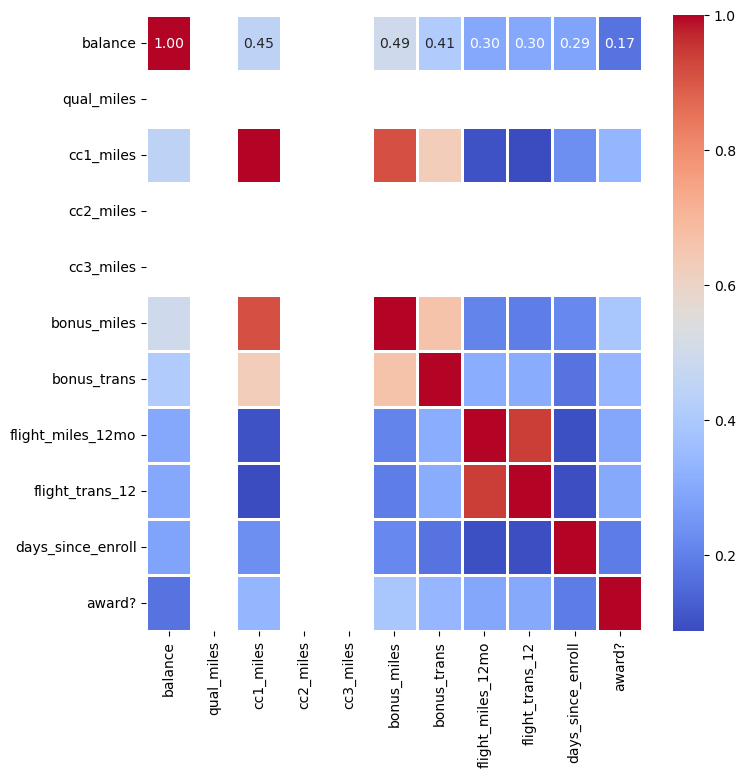

In [50]:
plt.figure(figsize=(8,8))
sn.heatmap(data2.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

## Clustering

### Hierarchical or Agglomerative clustering

In [51]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

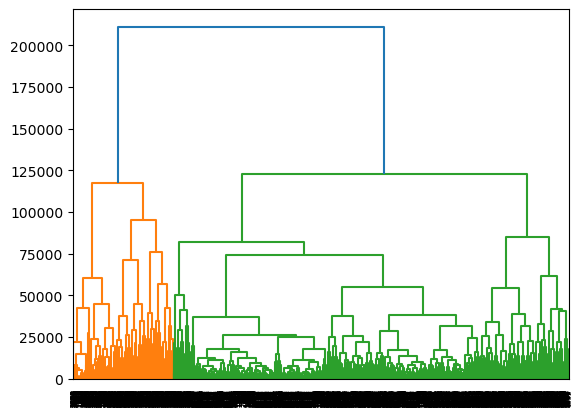

In [52]:
dendrogram=sch.dendrogram(sch.linkage(data2, method='complete'))

###### Dendrogram is not visulize the large data

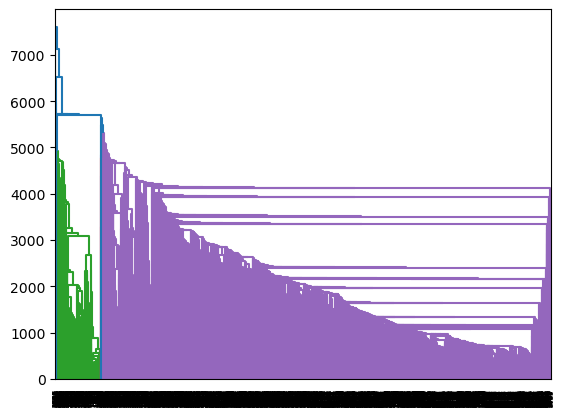

In [53]:
dendrogram=sch.dendrogram(sch.linkage(data2, method='single'))

##### single dendrogram is deficult to identify the clusters

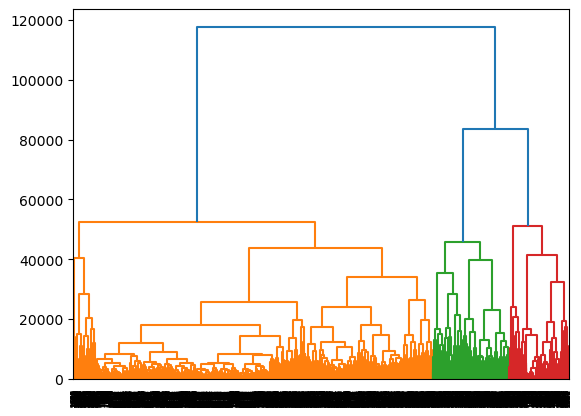

In [54]:
dendrogram=sch.dendrogram(sch.linkage(data2, method='average'))

##### ->Here using dendrogram in three linkage methods they are (single,complete,average), In this complete method is little bit good remaining two methods are very complex.
##### -> Dendrogram is not good for large data set.

In [55]:
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
hc.fit(data2)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [56]:
hc.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int64)

In [57]:
data2['h_clusterid']=hc.labels_
data2.head()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0  28143.0           0          1          1          1        174.0   
1  19244.0           0          1          1          1        215.0   
2  41354.0           0          1          1          1       4123.0   
3  14776.0           0          1          1          1        500.0   
4  97752.0           0          4          1          1      43300.0   

   bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  award?  \
0            1                0.0              0.0             7000.0     0.0   
1            2                0.0              0.0             6968.0     0.0   
2            4                0.0              0.0             7034.0     0.0   
3            1                0.0              0.0             6952.0     0.0   
4           26              777.5              2.5             6935.0     1.0   

   h_clusterid  
0            2  
1            2  
2            2  
3            2  
4            0

In [58]:
data3=data2.sort_values("h_clusterid")
data3.iloc[:,[0,-1]]

balance  h_clusterid
1999  203218.75            0
911   203218.75            0
2230  203218.75            0
914   203218.75            0
917   203218.75            0
...         ...          ...
1805   11834.00            2
1806   23552.00            2
1808   55639.00            2
1699   35895.00            2
3998    3016.00            2

[3999 rows x 2 columns]

In [59]:
data2.iloc[:,1:].groupby(['h_clusterid']).mean()

qual_miles  cc1_miles  cc2_miles  cc3_miles   bonus_miles  \
h_clusterid                                                              
0                   0.0   3.081081        1.0        1.0  30812.059582   
1                   0.0   2.696503        1.0        1.0  23379.745455   
2                   0.0   1.538462        1.0        1.0   8028.330972   

             bonus_trans  flight_miles_12mo  flight_trans_12  \
h_clusterid                                                    
0              17.329238         320.518428         1.044226   
1              14.573427         226.083217         0.732867   
2               8.641700         117.203644         0.401417   

             days_since_enroll    award?  
h_clusterid                               
0                  5074.545455  0.522113  
1                  4411.090909  0.408392  
2                  3718.829555  0.309312

##### Here using 3 clusters ,euclidean and complete linkage  

In [60]:
hc1=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='single')
hc1.fit(data2)

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=5)

In [61]:
hc1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
data2['h_clusterid']=hc1.labels_
data2.head()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0  28143.0           0          1          1          1        174.0   
1  19244.0           0          1          1          1        215.0   
2  41354.0           0          1          1          1       4123.0   
3  14776.0           0          1          1          1        500.0   
4  97752.0           0          4          1          1      43300.0   

   bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  award?  \
0            1                0.0              0.0             7000.0     0.0   
1            2                0.0              0.0             6968.0     0.0   
2            4                0.0              0.0             7034.0     0.0   
3            1                0.0              0.0             6952.0     0.0   
4           26              777.5              2.5             6935.0     1.0   

   h_clusterid  
0            0  
1            0  
2            0  
3            0  
4            0

In [63]:
data3=data2.sort_values("h_clusterid")
data3.iloc[:,[0,-1]]

balance  h_clusterid
0      28143.00            0
2656  203218.75            0
2657   61081.00            0
2658   27438.00            0
2659   14748.00            0
...         ...          ...
3998    3016.00            0
2780  182228.00            1
3501  177785.00            2
1641  169947.00            3
1295  184701.00            4

[3999 rows x 2 columns]

In [64]:
data2.iloc[:,1:].groupby(['h_clusterid']).mean()

qual_miles  cc1_miles  cc2_miles  cc3_miles   bonus_miles  \
h_clusterid                                                              
0                   0.0   2.057322        1.0        1.0  15377.989675   
1                   0.0   4.000000        1.0        1.0  41048.000000   
2                   0.0   5.000000        1.0        1.0  57626.250000   
3                   0.0   4.000000        1.0        1.0  48140.000000   
4                   0.0   4.000000        1.0        1.0  45629.000000   

             bonus_trans  flight_miles_12mo  flight_trans_12  \
h_clusterid                                                    
0              11.466834         178.108761         0.591865   
1              12.000000           0.000000         0.000000   
2              15.000000           0.000000         0.000000   
3              21.000000           0.000000         0.000000   
4              13.000000         500.000000         1.000000   

             days_since_enroll    award?  
h_clusterid                               
0                  4119.360451  0.370463  
1                  2139.000000  0.000000  
2                  1251.000000  1.000000  
3                  4895.000000  0.000000  
4                  4989.000000  0.000000

In [65]:
hc2=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='average')
hc2.fit(data2)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=5)

In [66]:
hc2.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
data2['h_clusterid']=hc2.labels_
data2.head()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0  28143.0           0          1          1          1        174.0   
1  19244.0           0          1          1          1        215.0   
2  41354.0           0          1          1          1       4123.0   
3  14776.0           0          1          1          1        500.0   
4  97752.0           0          4          1          1      43300.0   

   bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  award?  \
0            1                0.0              0.0             7000.0     0.0   
1            2                0.0              0.0             6968.0     0.0   
2            4                0.0              0.0             7034.0     0.0   
3            1                0.0              0.0             6952.0     0.0   
4           26              777.5              2.5             6935.0     1.0   

   h_clusterid  
0            1  
1            1  
2            1  
3            1  
4            0

In [68]:
data2.iloc[:,1:].groupby(['h_clusterid']).mean()

qual_miles  cc1_miles  cc2_miles  cc3_miles   bonus_miles  \
h_clusterid                                                              
0                   0.0   2.622764        1.0        1.0  23163.852033   
1                   0.0   1.587652        1.0        1.0   8207.218302   
2                   0.0   2.903061        1.0        1.0  29463.404974   
3                   0.0   4.263736        1.0        1.0  50299.796703   
4                   0.0   4.370787        1.0        1.0  48827.912921   

             bonus_trans  flight_miles_12mo  flight_trans_12  \
h_clusterid                                                    
0              14.424390         270.901626         0.880488   
1               8.987505         123.370452         0.416942   
2              17.928571         366.521684         1.209184   
3              20.247253         242.181319         0.807692   
4              20.584270         247.140449         0.769663   

             days_since_enroll    award?  
h_clusterid                               
0                  4728.157724  0.414634  
1                  3734.764057  0.291804  
2                  5318.165816  0.558673  
3                  4797.258242  0.906593  
4                  4968.393258  0.539326

## K-Means Clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [70]:
kmean=KMeans(n_clusters=2)
kmean.fit(data2)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [71]:
labels_2=kmean.labels_
labels_2

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
kmean.inertia_

4473200474751.01

In [73]:
inertia=[]
k=list(range(2,11))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(data2)
    inertia.append(kc.inertia_)
    print(i,inertia)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 [4473200474751.009]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 [4473200474751.009, 2437674122429.3975]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 [4473200474751.009, 2437674122429.3975, 1719224935644.518]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 [4473200474751.009, 2437674122429.3975, 1719224935644.518, 1415675028615.7065]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 [4473200474751.009, 2437674122429.3975, 1719224935644.518, 1415675028615.7065, 1169224689172.7148]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 [4473200474751.009, 2437674122429.3975, 1719224935644.518, 1415675028615.7065, 1169224689172.7148, 1010968780847.9026]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 [4473200474751.009, 2437674122429.3975, 1719224935644.518, 1415675028615.7065, 1169224689172.7148, 1010968780847.9026, 867335906677.6301]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 [4473200474751.009, 2437674122429.3975, 1719224935644.518, 1415675028615.7065, 1169224689172.7148, 1010968780847.9026, 867335906677.6301, 727919776385.3616]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 [4473200474751.009, 2437674122429.3975, 1719224935644.518, 1415675028615.7065, 1169224689172.7148, 1010968780847.9026, 867335906677.6301, 727919776385.3616, 624679406923.7693]


In [74]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0, 0.5, 'ineartia')

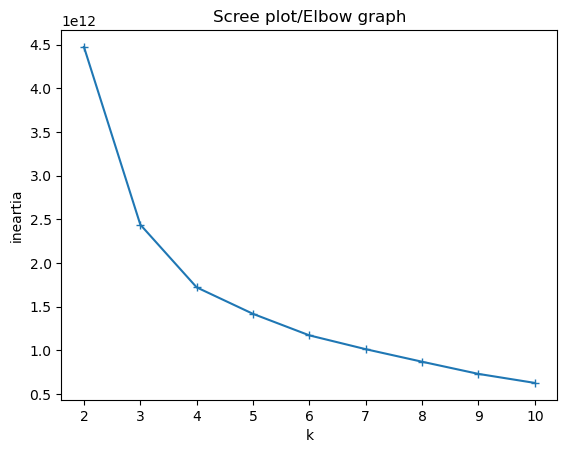

In [75]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("ineartia")

In [76]:
ss_2=silhouette_score(data2,labels_2)
ss_2

0.642588922612067

In [77]:
kmeans=KMeans(n_clusters=3)

In [78]:
kmeans.fit(data2)
labels=kmeans.labels_
labels

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2])

In [79]:
kmeans.inertia_

2437699087355.9688

In [80]:
ss_3= silhouette_score(data2,labels)
ss_3

0.5417466985133076

In [81]:
kmean5=KMeans(n_clusters=5)
kmean5.fit(data2)
label_5=kmean5.labels_
label_5

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 0, ..., 4, 0, 3])

In [82]:
kmean5.inertia_

1415650450125.8591

In [83]:
ss_5=silhouette_score(data2,label_5)
ss_5

0.43361343829891696

In [84]:
print(ss_2,ss_3,ss_5)

0.642588922612067 0.5417466985133076 0.43361343829891696


##### -> Using diffrent no.of clusters like 2,3,5 in three 2 clusters are better to compare the silhouette score
##### -> The Scree plot showing 3 clusters are better.and we dicide to take three clusters are better 

### DBSCAN(Density Based Spatical Clustering of Applications with Noise)

In [85]:
from sklearn.cluster import DBSCAN

In [86]:
dbscan=DBSCAN(eps=1,min_samples=11)



In [87]:
labels_db=pd.Series(dbscan.fit_predict(data2))

In [88]:
labels_db

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
3994   -1
3995   -1
3996   -1
3997   -1
3998   -1
Length: 3999, dtype: int64

In [89]:
labels_db.value_counts()

-1    3999
Name: count, dtype: int64

In [90]:
##ss_db1=silhouette_score(data2,dbscan.labels_)
##ss_db1

#### Here data is not scaled that's why all in outliers

## Now we  are using Scaled data

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
data5=data1.drop(['ID#'],axis=1)
data5.head(2)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0

In [93]:
#array=data5.values
#array

In [94]:
'''scaler=StandardScaler()
data_scaler=scaler.fit_transform(data5)
data_scaler'''

'scaler=StandardScaler()\ndata_scaler=scaler.fit_transform(data5)\ndata_scaler'

In [95]:
data5.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [96]:
def stand_func(i):
    x=(i-i.mean())/i.std()
    return x

In [97]:
data_scaler=stand_func(data5)
data_scaler

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451084   -0.186275  -0.769482   -0.09823  -0.062759    -0.702698   
1    -0.539389   -0.186275  -0.769482   -0.09823  -0.062759    -0.701001   
2    -0.319991   -0.186275  -0.769482   -0.09823  -0.062759    -0.539185   
3    -0.583726   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
4     0.239648   -0.186275   1.409295   -0.09823  -0.062759     1.082986   
...        ...         ...        ...        ...        ...          ...   
3994 -0.547010   -0.186275  -0.769482   -0.09823  -0.062759    -0.356915   
3995 -0.091454   -0.186275  -0.769482   -0.09823  -0.062759    -0.669284   
3996 -0.000043   -0.186275   0.683036   -0.09823  -0.062759     0.343761   
3997 -0.185584   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
3998 -0.700420   -0.186275  -0.769482   -0.09823  -0.062759    -0.709903   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.103926          -0.328562        -0.362123           1.395280   
1       -0.999801          -0.328562        -0.362123           1.379784   
2       -0.791550          -0.328562        -0.362123           1.411744   
3       -1.103926          -0.328562        -0.362123           1.372037   
4        1.499207           1.154788         0.692404           1.363805   
...           ...                ...              ...                ...   
3994    -0.791550          -0.185726        -0.098491          -1.314955   
3995    -0.687425          -0.328562        -0.362123          -1.318829   
3996    -0.375049          -0.328562        -0.362123          -1.315439   
3997    -1.103926           0.028527        -0.098491          -1.315924   
3998    -1.208052          -0.328562        -0.362123          -1.317376   

        Award?  
0    -0.766823  
1    -0.766823  
2    -0.766823  
3    -0.766823  
4     1.303755  
...        ...  
3994  1.303755  
3995  1.303755  
3996  1.303755  
3997 -0.766823  
3998 -0.766823  

[3999 rows x 11 columns]

<Axes: ylabel='Frequency'>

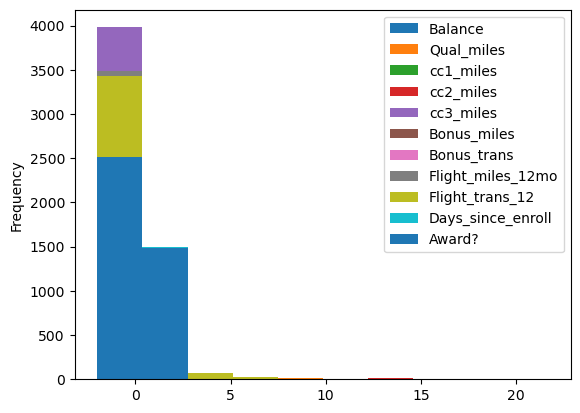

In [98]:
data_scaler.plot(kind='hist')

<Axes: >

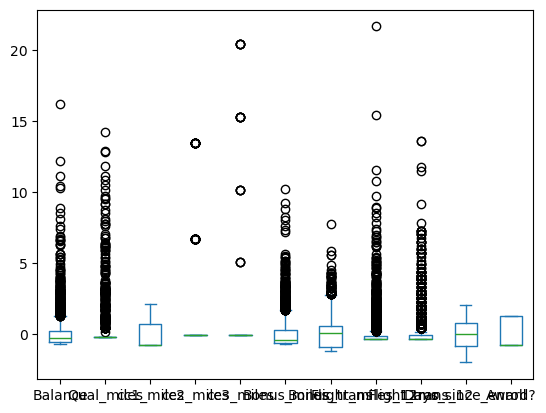

In [99]:
data_scaler.plot(kind='box')

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

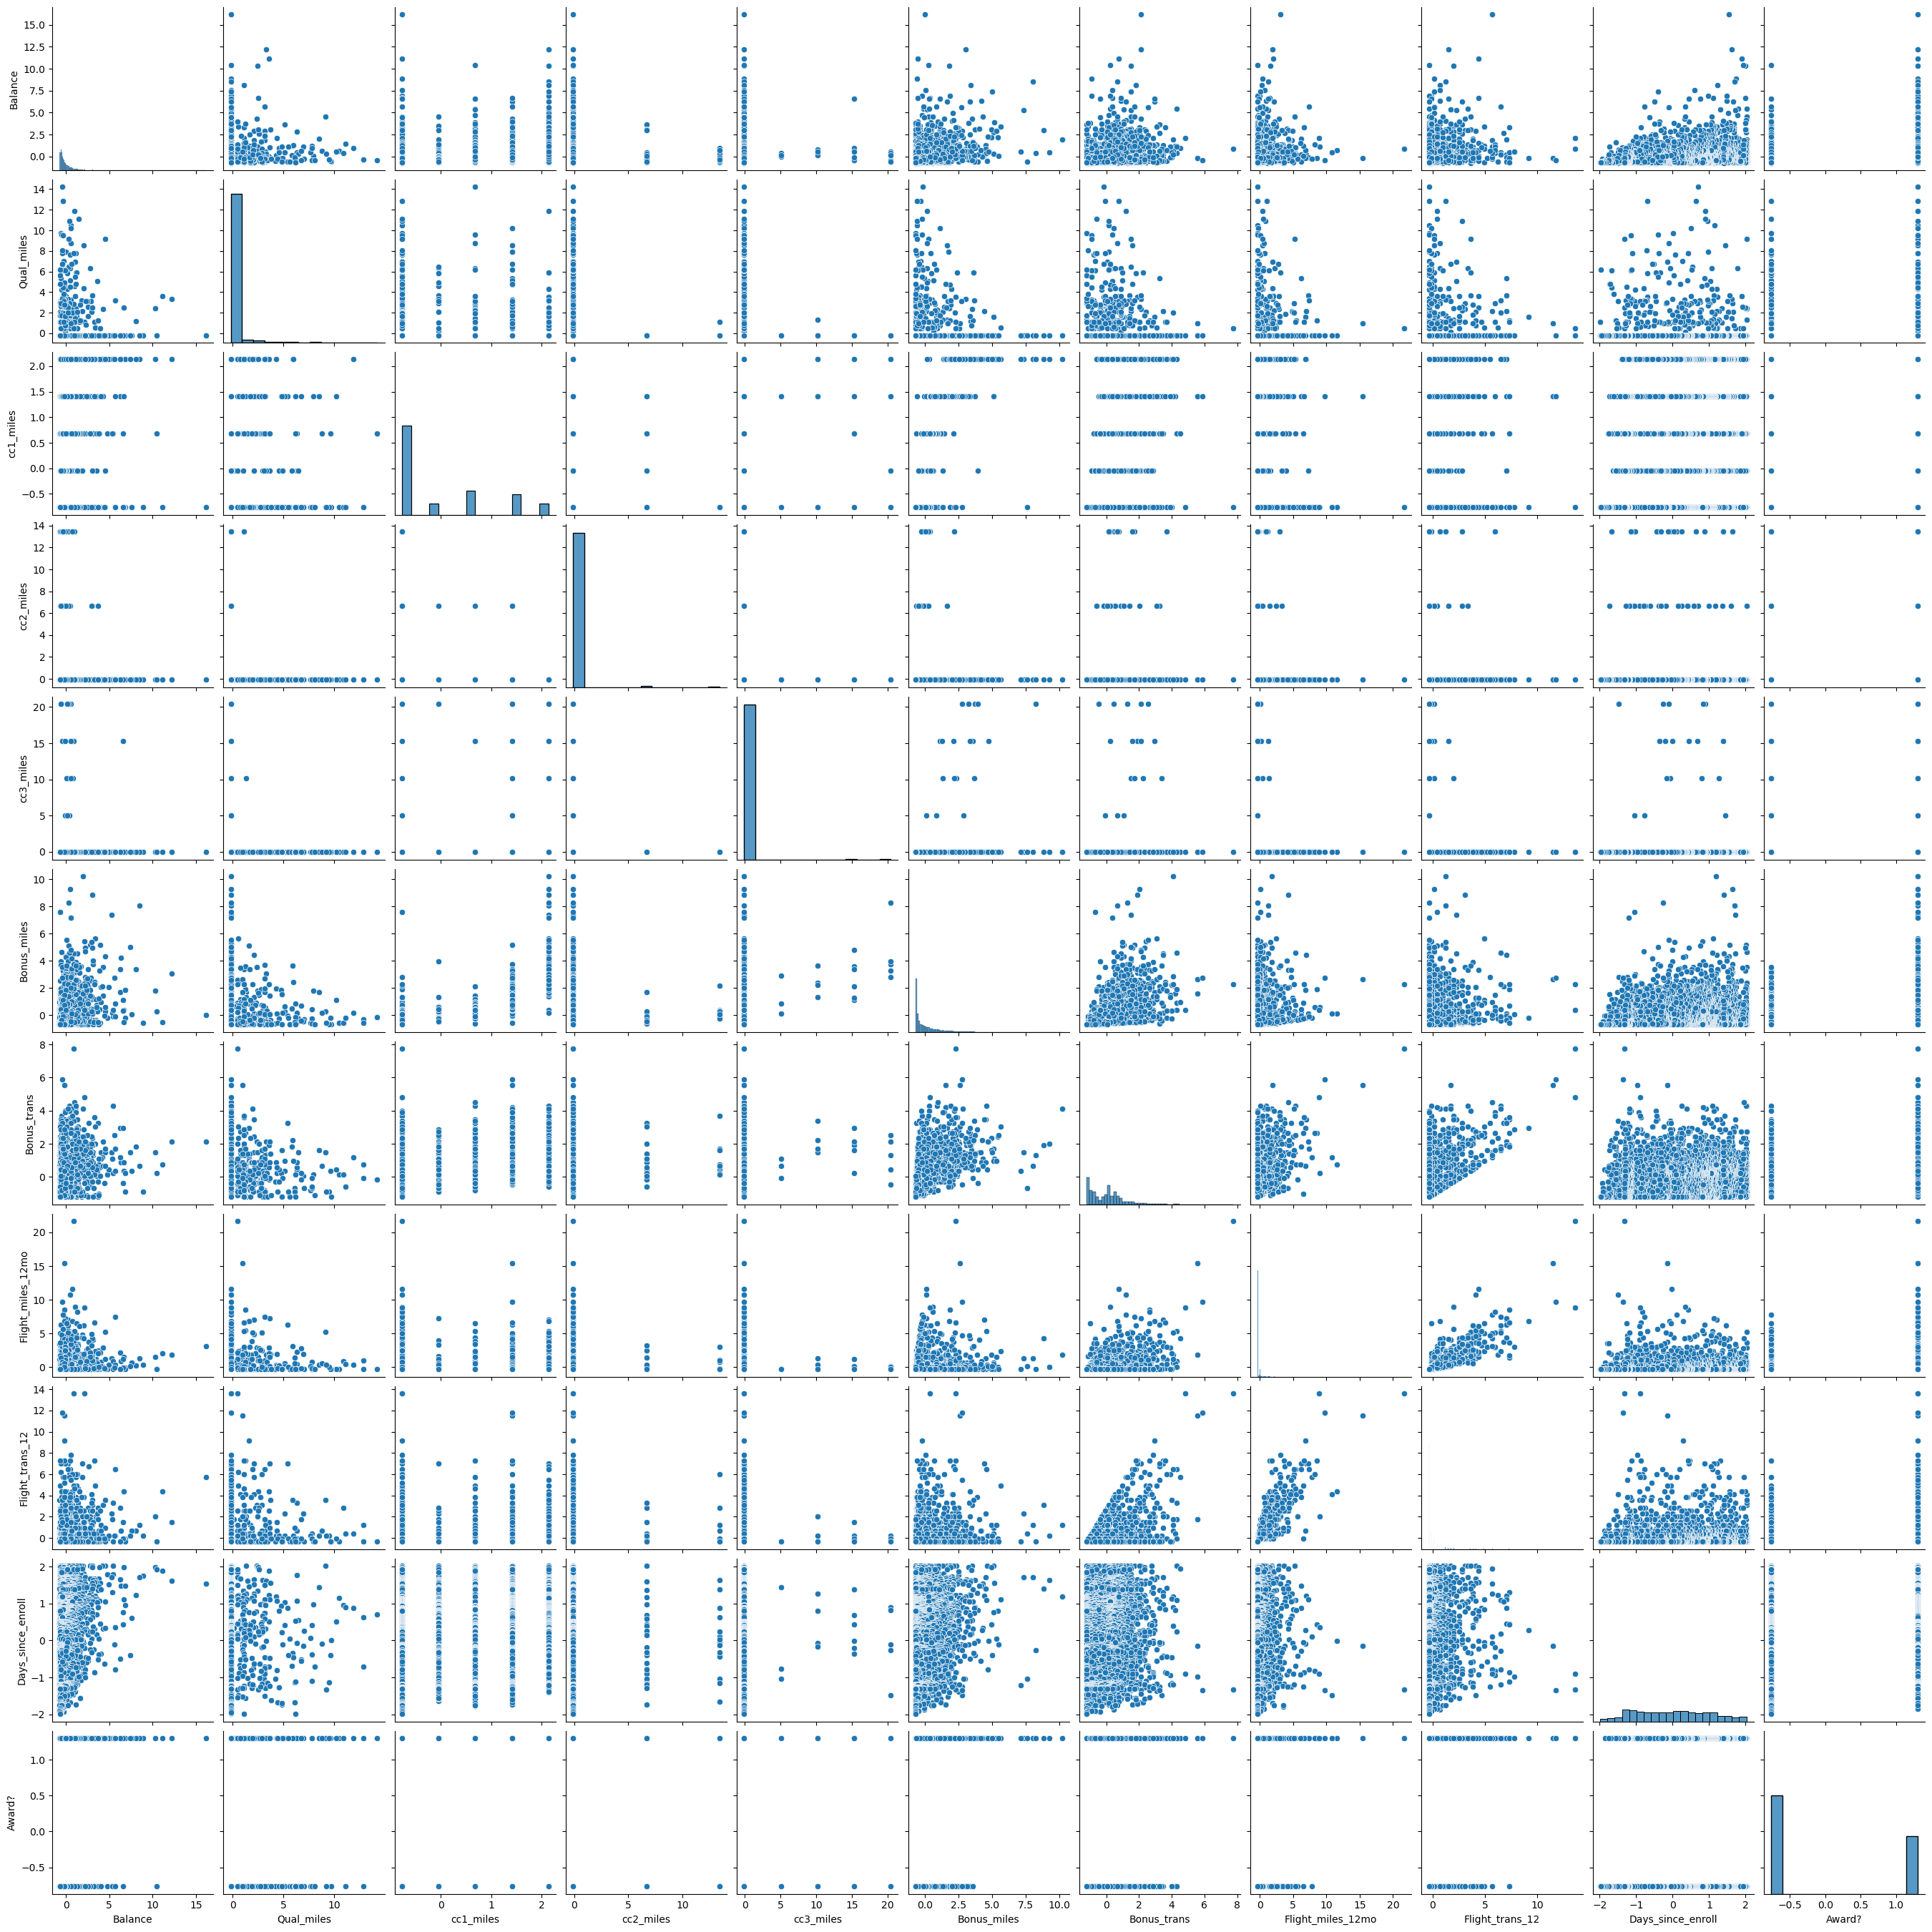

In [100]:
sn.pairplot(data_scaler)

In [101]:
data_scaler.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### Hierarchy (OR) Agglomerative Clustring

In [102]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [103]:
hc_s=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='single')
hc_s.fit(data_scaler)

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=3)

In [104]:
hc_slabels=hc_s.labels_
hc_slabels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

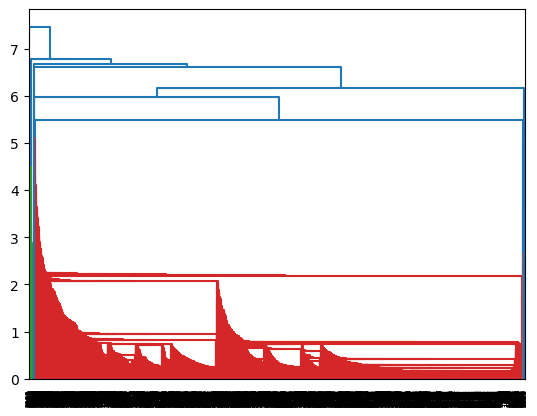

In [105]:
dendrogram=sch.dendrogram(sch.linkage(data_scaler,method='single'))


In [156]:
data_scaler['h_clusterid']=hc_slabels
final_clu=data_scaler

In [157]:
final_clu.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451084   -0.186275  -0.769482   -0.09823  -0.062759    -0.702698   
1 -0.539389   -0.186275  -0.769482   -0.09823  -0.062759    -0.701001   
2 -0.319991   -0.186275  -0.769482   -0.09823  -0.062759    -0.539185   
3 -0.583726   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
4  0.239648   -0.186275   1.409295   -0.09823  -0.062759     1.082986   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.103926          -0.328562        -0.362123           1.395280   
1    -0.999801          -0.328562        -0.362123           1.379784   
2    -0.791550          -0.328562        -0.362123           1.411744   
3    -1.103926          -0.328562        -0.362123           1.372037   
4     1.499207           1.154788         0.692404           1.363805   

     Award?  h_clusterid  Cluster  
0 -0.766823            0        0  
1 -0.766823            0        0  
2 -0.766823            0        0  
3 -0.766823            0        0  
4  1.303755            0       -1

In [158]:
final_clu.groupby(['h_clusterid']).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
h_clusterid                                                          
0            0.000583    0.000262   0.003091  -0.050618   0.000252   
1            0.858468    0.460000  -0.769482  -0.098230  -0.062759   
2           -0.212054   -0.100105  -0.769482  13.447294  -0.062759   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
h_clusterid                                                                 
0              -0.001079    -0.004820          -0.006069        -0.005230   
1               2.269439     7.746727          21.680292        13.610351   
2               0.135217     0.763388           0.166126         0.481498   

             Days_since_enroll    Award?   Cluster  
h_clusterid                                         
0                     0.000412 -0.000559  0.007281  
1                    -1.329482  1.303755 -1.000000  
2                    -0.020835  0.061408 -1.000000

<Axes: xlabel='Balance', ylabel='Days_since_enroll'>

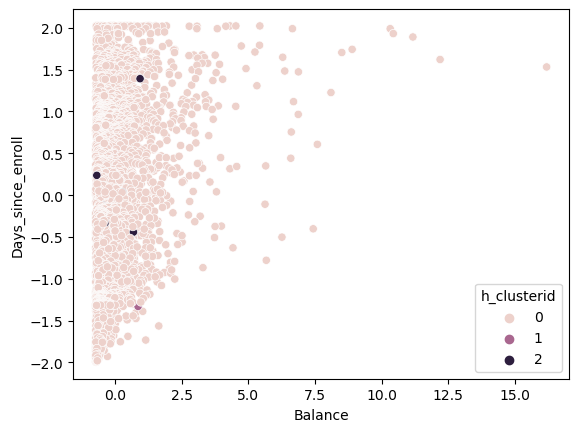

In [159]:
sn.scatterplot(x=data_scaler['Balance'],y=data_scaler['Days_since_enroll'],hue=data_scaler['h_clusterid'])

In [160]:
hc_s1=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='complete')
hc_s1.fit(data_scaler)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=5)

In [161]:
hc_s1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

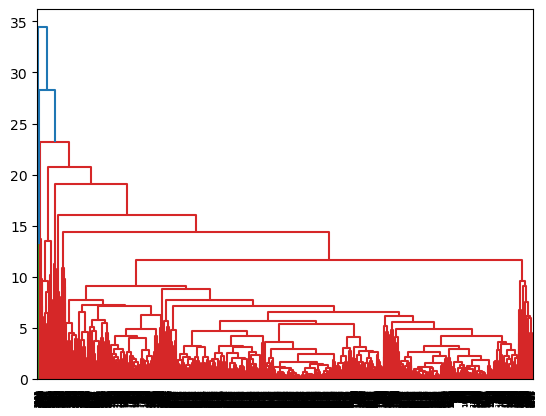

In [162]:
dendrogram=sch.dendrogram(sch.linkage(data_scaler,method='complete'))

In [169]:
data_scaler['h_clusterid']=hc_s.labels_


In [165]:
data_scaler.groupby(['h_clusterid']).mean()


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
h_clusterid                                                          
0            0.000583    0.000262   0.003091  -0.050618   0.000252   
1            0.858468    0.460000  -0.769482  -0.098230  -0.062759   
2           -0.212054   -0.100105  -0.769482  13.447294  -0.062759   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
h_clusterid                                                                 
0              -0.001079    -0.004820          -0.006069        -0.005230   
1               2.269439     7.746727          21.680292        13.610351   
2               0.135217     0.763388           0.166126         0.481498   

             Days_since_enroll    Award?   Cluster  
h_clusterid                                         
0                     0.000412 -0.000559  0.007281  
1                    -1.329482  1.303755 -1.000000  
2                    -0.020835  0.061408 -1.000000

<Axes: xlabel='Qual_miles', ylabel='Days_since_enroll'>

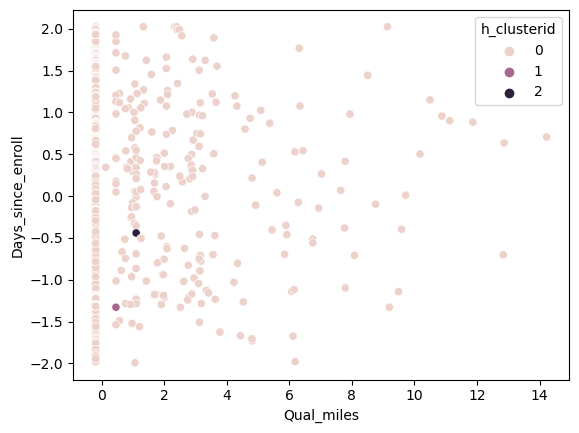

In [167]:
sn.scatterplot(x=data_scaler['Qual_miles'],y=data_scaler['Days_since_enroll'],hue=data_scaler['h_clusterid'])

In [119]:
#sn.pairplot(final_clu)

In [120]:
hc_s2=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='average')
hc_s2.fit(data_scaler)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

In [121]:
hc_s2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

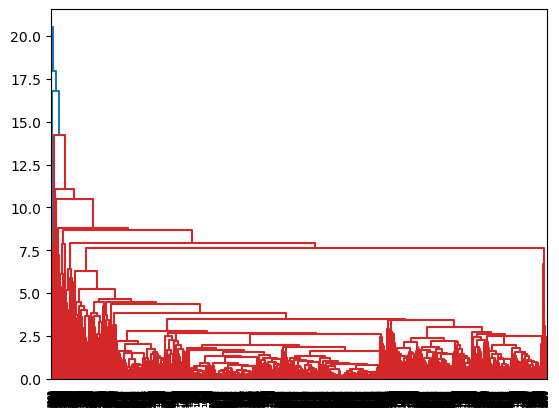

In [122]:
dendrogram=sch.dendrogram(sch.linkage(data_scaler,method='average'))

In [123]:
data_scaler['h_clusterid']=hc_s2.labels_

In [124]:
data_scaler.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451084   -0.186275  -0.769482   -0.09823  -0.062759    -0.702698   
1 -0.539389   -0.186275  -0.769482   -0.09823  -0.062759    -0.701001   
2 -0.319991   -0.186275  -0.769482   -0.09823  -0.062759    -0.539185   
3 -0.583726   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
4  0.239648   -0.186275   1.409295   -0.09823  -0.062759     1.082986   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.103926          -0.328562        -0.362123           1.395280   
1    -0.999801          -0.328562        -0.362123           1.379784   
2    -0.791550          -0.328562        -0.362123           1.411744   
3    -1.103926          -0.328562        -0.362123           1.372037   
4     1.499207           1.154788         0.692404           1.363805   

     Award?  h_clusterid  
0 -0.766823            0  
1 -0.766823            0  
2 -0.766823            0  
3 -0.766823            0  
4  1.303755            0

In [125]:
data_scaler.groupby(['h_clusterid']).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
h_clusterid                                                           
0            -0.004633   -0.000216  -0.000128   0.000123   0.000079   
1             0.579487    0.262240   0.319906  -0.098230  -0.062759   
2            16.186811   -0.186275  -0.769482  -0.098230  -0.062759   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
h_clusterid                                                                 
0              -0.002010    -0.006543          -0.014728        -0.014068   
1               2.007762     6.002628          13.926451        12.621732   
2              -0.001526     2.123959           3.115923         5.701404   

             Days_since_enroll    Award?  
h_clusterid                               
0                     0.000547 -0.001632  
1                    -0.928903  1.303755  
2                     1.532317  1.303755

<Axes: xlabel='Bonus_miles', ylabel='Days_since_enroll'>

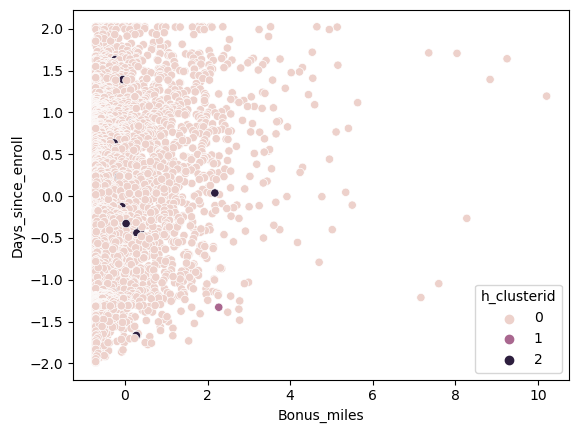

In [168]:
sn.scatterplot(x=data_scaler['Bonus_miles'],y=data_scaler['Days_since_enroll'],hue=data_scaler['h_clusterid'])

### K-Means Clustering

In [126]:
kmean_s=KMeans(n_clusters=3)
kmean_s.fit(data_scaler)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [127]:
labels_s=kmean_s.labels_
labels_s

array([0, 0, 0, ..., 1, 0, 0])

In [128]:
kmean_s.inertia_

30899.827822025192

In [129]:
inertia=[]
k_s=list(range(2,11))
for i in k_s:
    kc=KMeans(n_clusters=i)
    kc.fit(data_scaler)
    inertia.append(kc.inertia_)
    print(i,inertia)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 [35408.63438730257]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 [35408.63438730257, 30899.32496009767]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 [35408.63438730257, 30899.32496009767, 27163.19164153602]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 [35408.63438730257, 30899.32496009767, 27163.19164153602, 24890.985902112523]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 [35408.63438730257, 30899.32496009767, 27163.19164153602, 24890.985902112523, 21094.50940310313]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 [35408.63438730257, 30899.32496009767, 27163.19164153602, 24890.985902112523, 21094.50940310313, 19169.23244487457]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 [35408.63438730257, 30899.32496009767, 27163.19164153602, 24890.985902112523, 21094.50940310313, 19169.23244487457, 17320.162170469604]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 [35408.63438730257, 30899.32496009767, 27163.19164153602, 24890.985902112523, 21094.50940310313, 19169.23244487457, 17320.162170469604, 15968.54981295978]


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 [35408.63438730257, 30899.32496009767, 27163.19164153602, 24890.985902112523, 21094.50940310313, 19169.23244487457, 17320.162170469604, 15968.54981295978, 14731.08475938456]


Text(0, 0.5, 'ineartia')

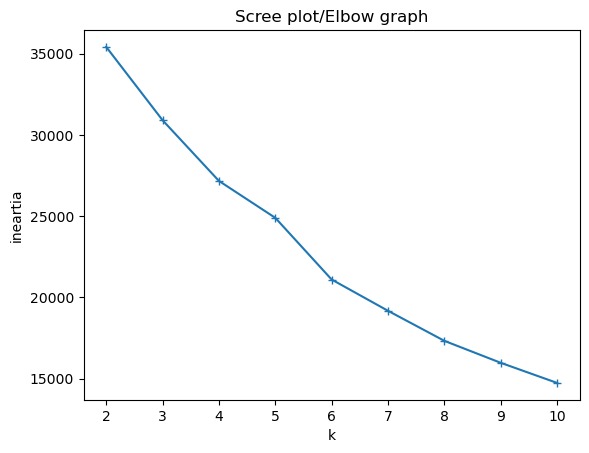

In [130]:
plt.plot(k_s,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("ineartia")

In [131]:
ss_s1=silhouette_score(data_scaler,labels_s)
ss_s1

0.312992125651302

In [132]:
kmean_s1=KMeans(n_clusters=5)
kmean_s1.fit(data_scaler)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [133]:
labels_s1=kmean_s1.labels_
labels_s1

array([3, 3, 3, ..., 0, 3, 3])

In [134]:
kmean_s1.inertia_

23708.427055017582

In [135]:
ss_s2=silhouette_score(data_scaler,labels_s1)
ss_s2

0.32290837295659314

In [136]:
print(ss_s1,ss_s2)

0.312992125651302 0.32290837295659314


##### -> Here using Scalling dataset.Kmeans in 3 clusters are better 
##### -> Compare the silhouette score 

##### -> Tried with diffrent k values 

### DBSCAN

In [137]:
dbscan_s=DBSCAN(eps=0.8
                ,min_samples=11)

##### I tried different values of epsilon (0.75,0.85,0.89,0.9)But in this  all less clusters and more outeliers and finally using epsilon values 0.8 is  good

In [138]:
labels_db1=pd.Series(dbscan_s.fit_predict(data_scaler))

In [139]:
labels_db1

0       0
1       0
2       0
3       0
4      -1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Length: 3999, dtype: int64

In [140]:
labels_db1.value_counts()

 0    2142
-1     943
 1     887
 3      15
 2      12
Name: count, dtype: int64

In [141]:
data_scaler['Cluster']=dbscan_s.labels_
data_scaler.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451084   -0.186275  -0.769482   -0.09823  -0.062759    -0.702698   
1 -0.539389   -0.186275  -0.769482   -0.09823  -0.062759    -0.701001   
2 -0.319991   -0.186275  -0.769482   -0.09823  -0.062759    -0.539185   
3 -0.583726   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
4  0.239648   -0.186275   1.409295   -0.09823  -0.062759     1.082986   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.103926          -0.328562        -0.362123           1.395280   
1    -0.999801          -0.328562        -0.362123           1.379784   
2    -0.791550          -0.328562        -0.362123           1.411744   
3    -1.103926          -0.328562        -0.362123           1.372037   
4     1.499207           1.154788         0.692404           1.363805   

     Award?  h_clusterid  Cluster  
0 -0.766823            0        0  
1 -0.766823            0        0  
2 -0.766823            0        0  
3 -0.766823            0        0  
4  1.303755            0       -1

In [142]:
data_scaler[data_scaler['Cluster']== -1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4     0.239648   -0.186275   1.409295  -0.098230  -0.062759     1.082986   
8     3.665584   -0.186275   0.683036   6.674532  -0.062759    -0.637318   
9     0.310181   -0.186275   0.683036  -0.098230  -0.062759     0.467110   
21    1.112170    2.429848  -0.769482  -0.098230  -0.062759    -0.159201   
22   -0.526093   -0.186275  -0.769482  -0.098230  -0.062759    -0.567052   
...        ...         ...        ...        ...        ...          ...   
3967 -0.467348   -0.186275  -0.043223  -0.098230  -0.062759    -0.271039   
3974 -0.150972   -0.186275   0.683036  -0.098230  -0.062759    -0.106159   
3979 -0.156867   -0.186275   0.683036  -0.098230  -0.062759     0.157930   
3980 -0.443900   -0.186275   0.683036  -0.098230  -0.062759     0.083813   
3991 -0.341941   -0.186275   0.683036  -0.098230  -0.062759    -0.089597   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4        1.499207           1.154788         0.692404           1.363805   
8        3.269338           2.421027         2.801456           1.370100   
9        1.707458           0.492744         0.428772           1.361868   
21       0.457954           0.956960         2.010562           1.344920   
22      -0.062673           2.135355         2.537825           1.339109   
...           ...                ...              ...                ...   
3967     1.811583           0.385617         1.483298          -1.294618   
3974     2.852836          -0.328562        -0.362123          -1.299460   
3979     0.353828           0.527024         0.428772          -1.304786   
3980     1.707458          -0.328562        -0.362123          -1.304302   
3991     1.707458          -0.328562        -0.362123          -1.312534   

        Award?  h_clusterid  Cluster  
4     1.303755            0       -1  
8     1.303755            0       -1  
9     1.303755            0       -1  
21    1.303755            0       -1  
22   -0.766823            0       -1  
...        ...          ...      ...  
3967 -0.766823            0       -1  
3974 -0.766823            0       -1  
3979  1.303755            0       -1  
3980 -0.766823            0       -1  
3991 -0.766823            0       -1  

[943 rows x 13 columns]

In [143]:
ss_db=silhouette_score(data_scaler,dbscan_s.labels_)
ss_db

0.2063685230179016

In [144]:
print(ss_db)

0.2063685230179016


##### -> The DBSCAN is using the dectecing the outeliers. we got results outeliers .